In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('possum.csv')
data.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [3]:
data.drop('case', axis=1, inplace=True)

### Target is head length

In [4]:
data.isna().sum()

site        0
Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [5]:
missing_target_rows = data.loc[data['age'].isna(), :].index
data = data.drop(missing_target_rows, axis=0).reset_index(drop=True)

In [6]:
data.isna().sum()

site        0
Pop         0
sex         0
age         0
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [7]:
data['footlgth'] = data['footlgth'].fillna(data['footlgth'].mean())

In [8]:
data.isna().sum()

site        0
Pop         0
sex         0
age         0
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    0
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [9]:
data['Pop'].unique()

array(['Vic', 'other'], dtype=object)

In [10]:
data['sex'].unique()

array(['m', 'f'], dtype=object)

In [11]:
data['Pop'] = data['Pop'].replace({'other': 0, 'Vic': 1})
data['sex'] = data['sex'].replace({'m': 0, 'f': 1})

In [12]:
data.head()

,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,0,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,1,1,1,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,1,1,1,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,1,1,1,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,1,1,1,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


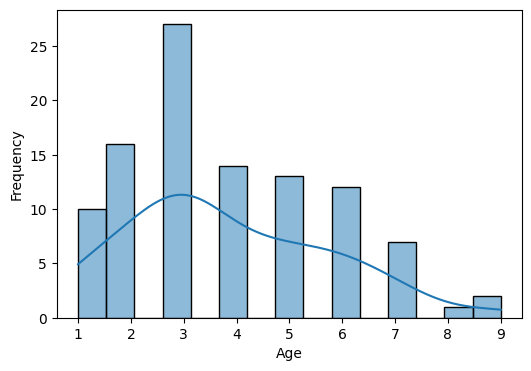

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.histplot(data["age"], kde=True, bins=15)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

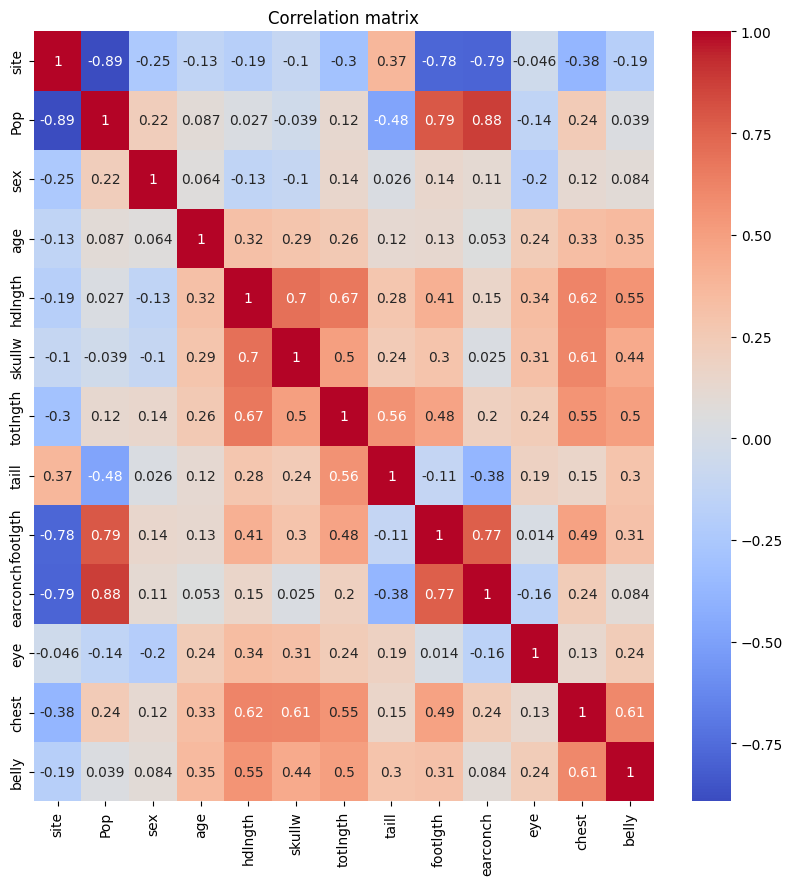

In [14]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation matrix")
plt.show()

In [15]:
data.drop('site', axis=1, inplace=True)
data.drop('Pop', axis=1, inplace=True)

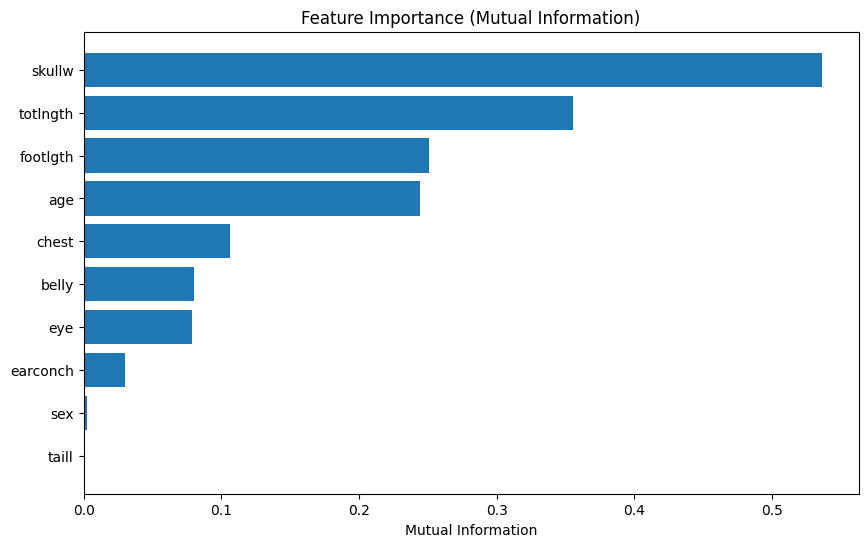

In [16]:
from sklearn.feature_selection import mutual_info_regression

x = data.drop('hdlngth', axis=1)
y = data['hdlngth']
# Вычисление важности признаков с использованием mutual information на ваших данных X_train и y_train
mutual_info = mutual_info_regression(x, y, random_state=42)
# Создание DataFrame для отображения результатов
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': mutual_info})
# Сортировка по важности
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)
# Визуализация важности признаков
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Mutual Information')
plt.title('Feature Importance (Mutual Information)')
plt.show()

In [17]:
data.drop('taill', axis=1, inplace=True)
data.head()

,sex,age,hdlngth,skullw,totlngth,footlgth,earconch,eye,chest,belly
0,0,8.0,94.1,60.4,89.0,74.5,54.5,15.2,28.0,36.0
1,1,6.0,92.5,57.6,91.5,72.5,51.2,16.0,28.5,33.0
2,1,6.0,94.0,60.0,95.5,75.4,51.9,15.5,30.0,34.0
3,1,6.0,93.2,57.1,92.0,76.1,52.2,15.2,28.0,34.0
4,1,2.0,91.5,56.3,85.5,71.0,53.2,15.1,28.5,33.0


<Axes: xlabel='footlgth'>

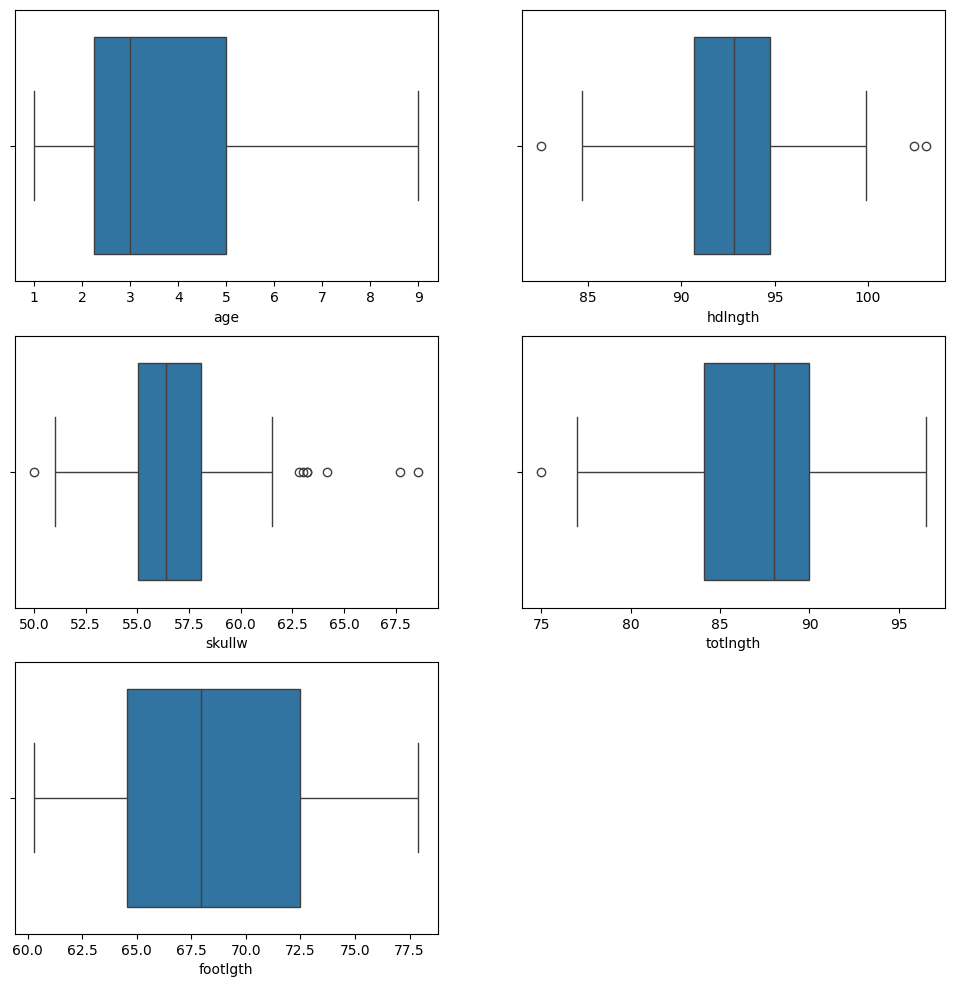

In [18]:
plt.figure(figsize=(12, 12))

plt.subplot(3, 2, 1)
sns.boxplot(data=data, x='age')

plt.subplot(3, 2, 2)
sns.boxplot(data=data, x='hdlngth')

plt.subplot(3, 2, 3)
sns.boxplot(data=data, x='skullw')

plt.subplot(3, 2, 4)
sns.boxplot(data=data, x='totlngth')

plt.subplot(3, 2, 5)
sns.boxplot(data=data, x='footlgth')

<Axes: xlabel='belly'>

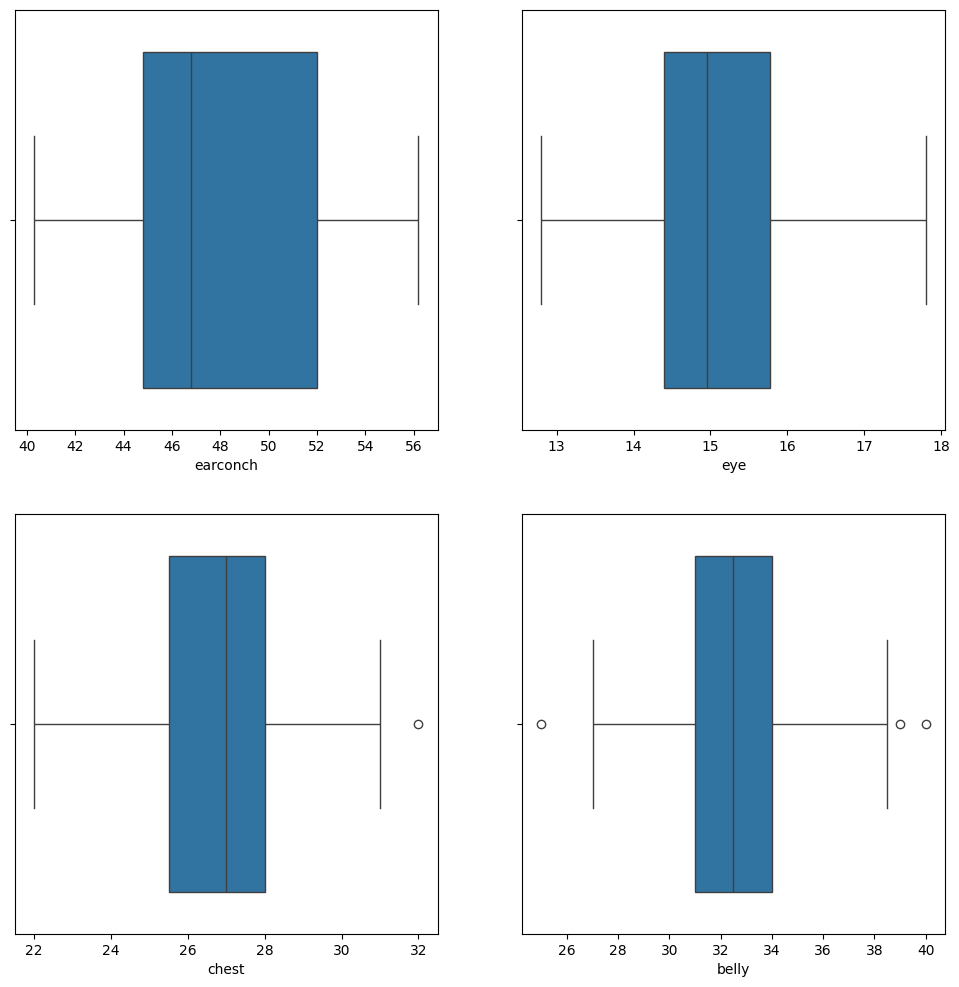

In [19]:
plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1)
sns.boxplot(data=data, x='earconch')

plt.subplot(2, 2, 2)
sns.boxplot(data=data, x='eye')

plt.subplot(2, 2, 3)
sns.boxplot(data=data, x='chest')

plt.subplot(2, 2, 4)
sns.boxplot(data=data, x='belly')

<Axes: xlabel='belly'>

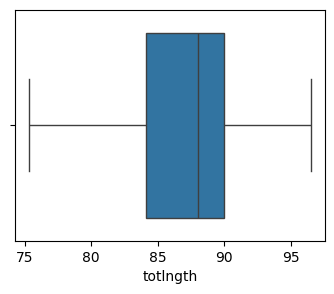

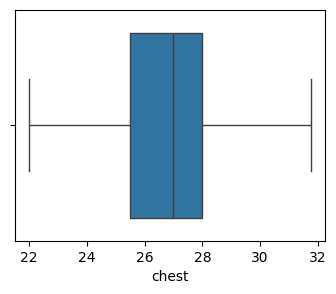

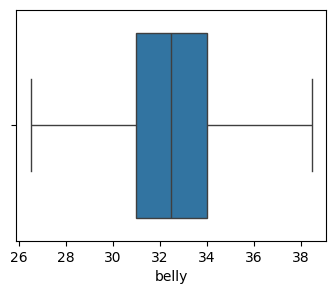

In [20]:
def handle_outliers(data, column):
    q1 = data[column].quantile(0.25) # Определение 25% процентиль
    q3 = data[column].quantile(0.75) # Определение 75% процентиль
    iqr = q3 - q1 # Определение размера ящика
    lower_whisker = q1 - 1.5 * iqr # Определение нижнего усика
    upper_whisker = q3 + 1.5 * iqr # Определение верхнего усика
    # Вариант 1: Замена выбросов значениями границ усов (если точки находятся за пределами усов, то тогда заменяем их на граничные значения усов)
    data[column] = data[column].apply(lambda x: lower_whisker if x < lower_whisker else (upper_whisker if x > upper_whisker else x))

handle_outliers(data, 'totlngth')
handle_outliers(data, 'chest')
handle_outliers(data, 'belly')

plt.figure(figsize=(4, 3))
sns.boxplot(data=data, x='totlngth')

plt.figure(figsize=(4, 3))
sns.boxplot(data=data, x='chest')

plt.figure(figsize=(4, 3))
sns.boxplot(data=data, x='belly')

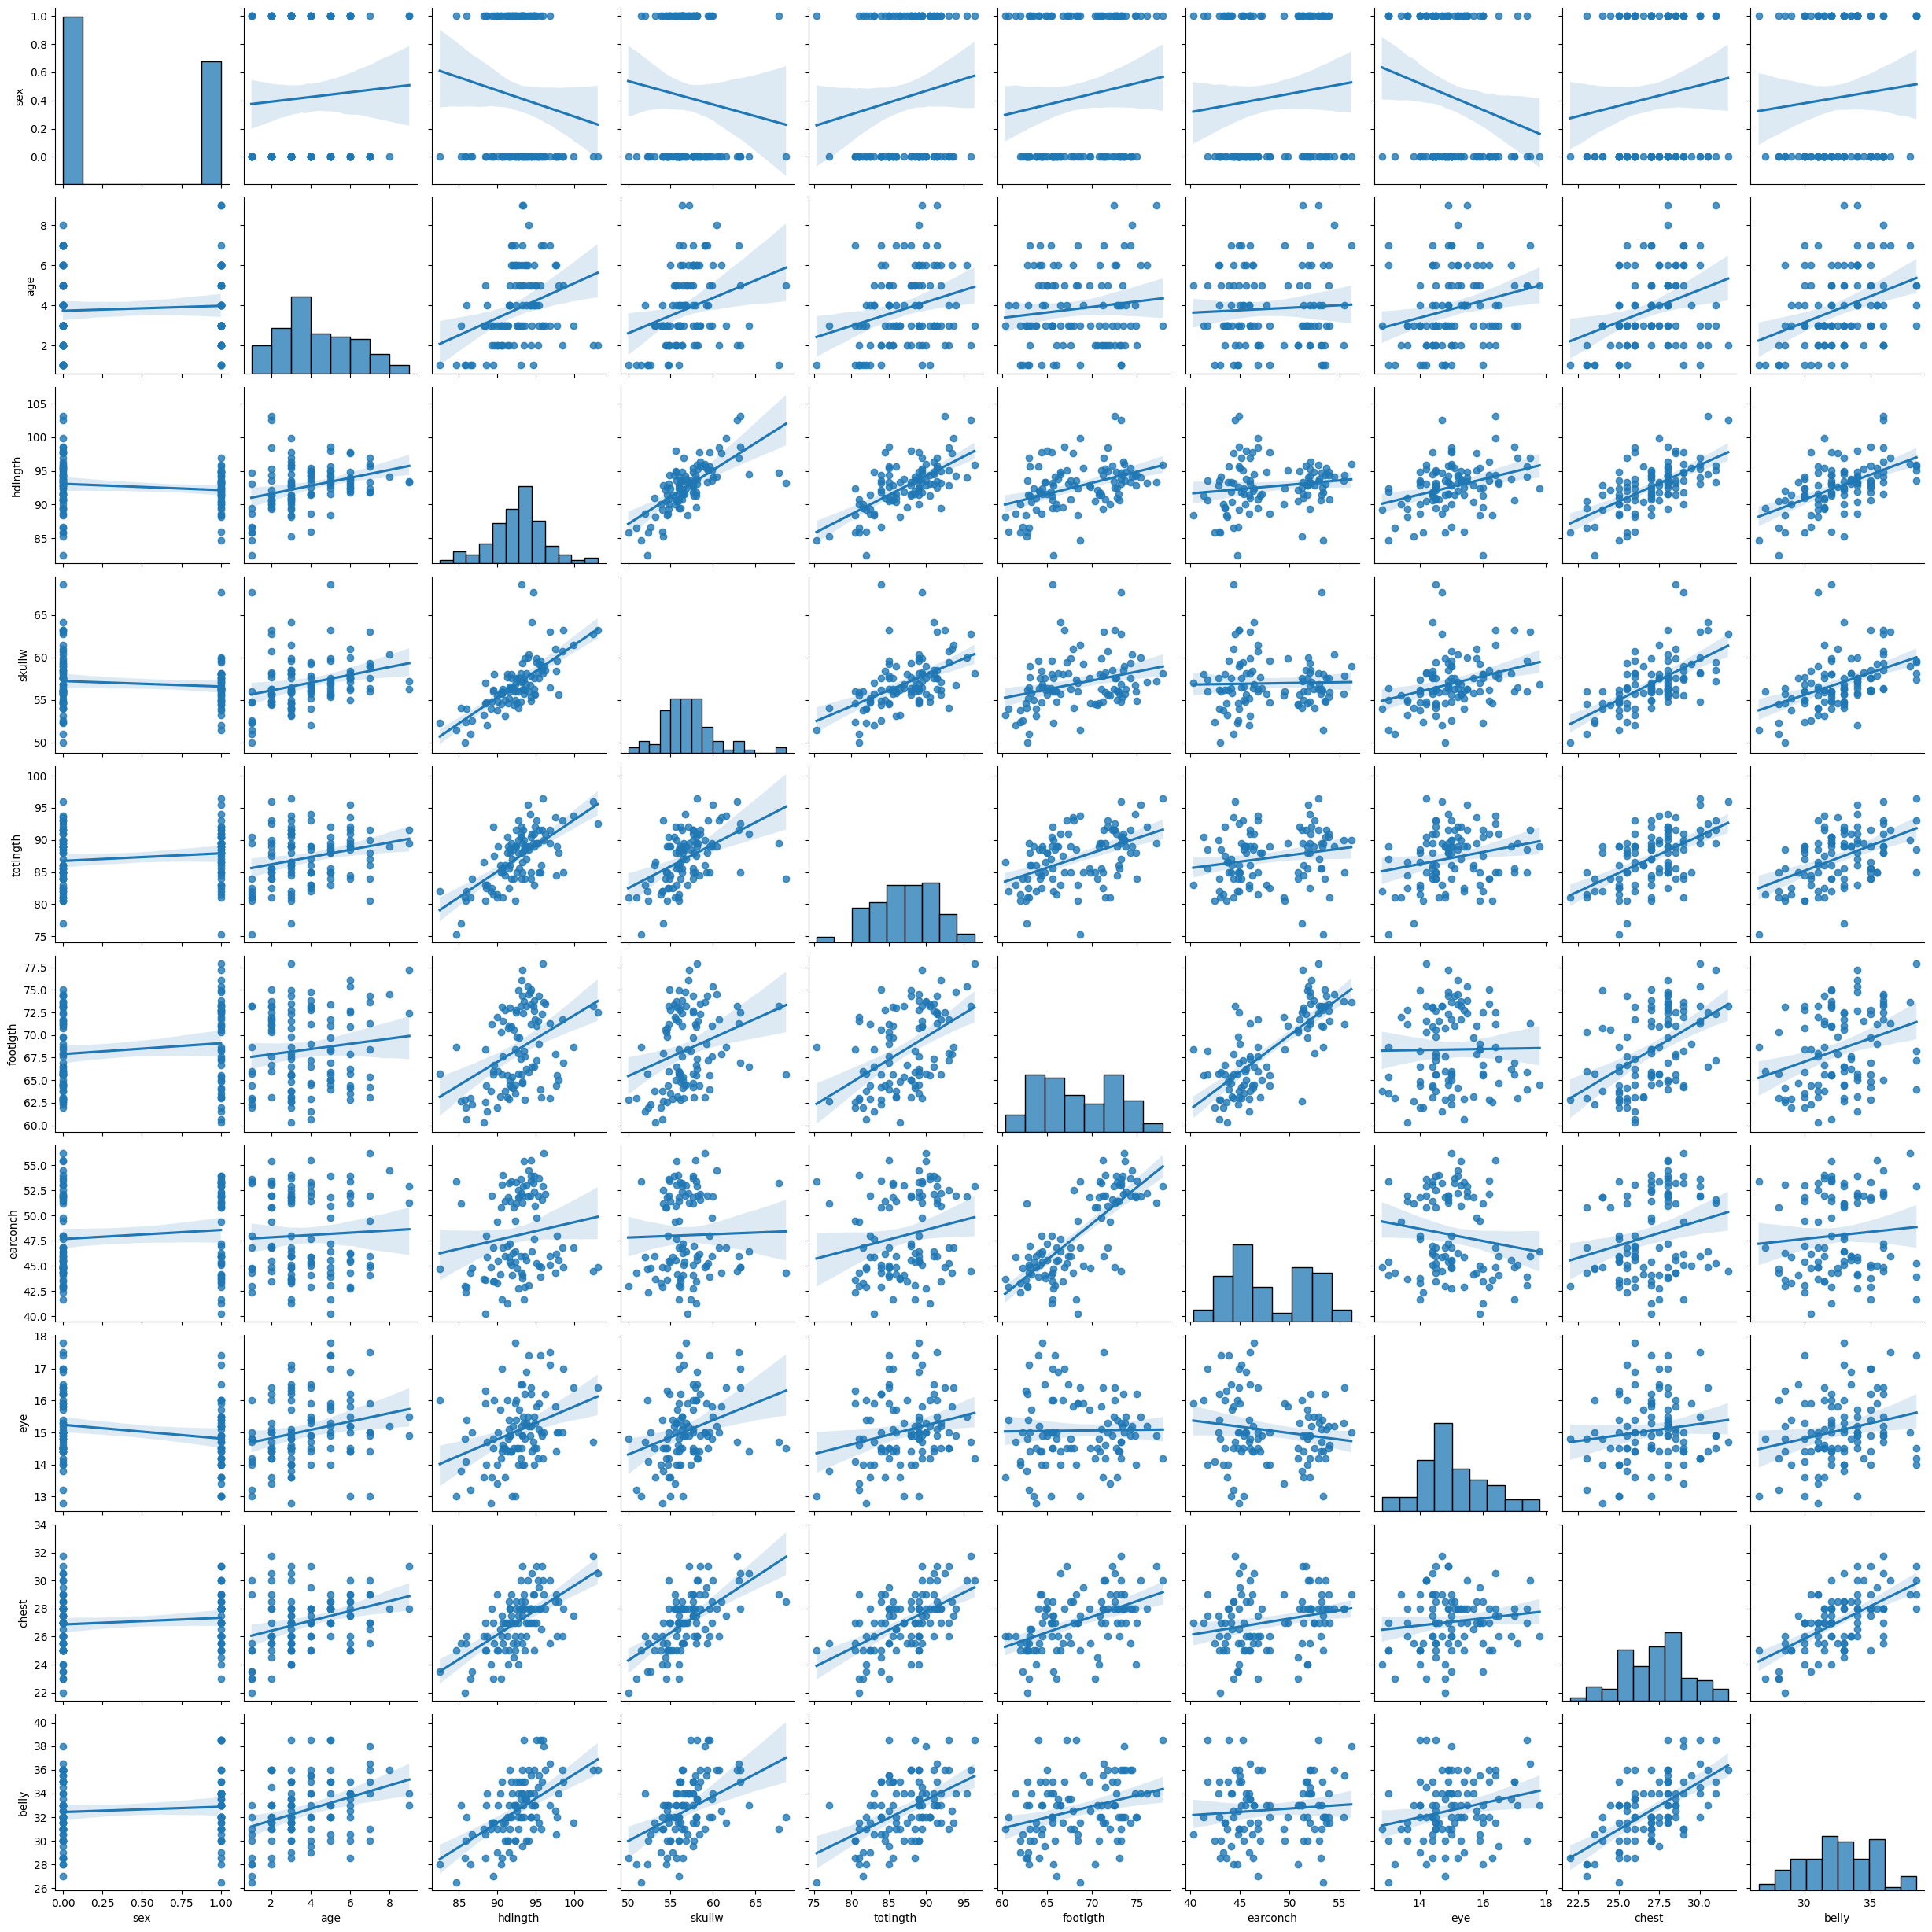

In [21]:
sns.pairplot(data, kind="reg")

In [22]:
data.head()

,sex,age,hdlngth,skullw,totlngth,footlgth,earconch,eye,chest,belly
0,0,8.0,94.1,60.4,89.0,74.5,54.5,15.2,28.0,36.0
1,1,6.0,92.5,57.6,91.5,72.5,51.2,16.0,28.5,33.0
2,1,6.0,94.0,60.0,95.5,75.4,51.9,15.5,30.0,34.0
3,1,6.0,93.2,57.1,92.0,76.1,52.2,15.2,28.0,34.0
4,1,2.0,91.5,56.3,85.5,71.0,53.2,15.1,28.5,33.0


In [23]:
x = data.drop('hdlngth', axis=1)
y = data['hdlngth']

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20)

In [25]:
x_train_scaled = x_train.loc[:, ['age', 'skullw', 'totlngth', 'footlgth', 'earconch', 'eye', 'chest', 'belly']]
x_test_scaled = x_test.loc[:, ['age', 'skullw', 'totlngth', 'footlgth', 'earconch', 'eye', 'chest', 'belly']]

In [26]:
# Compute the mean and standard deviation of the training set then transform it
scaler_linear = StandardScaler().fit(x_train_scaled)
x_train_scaled = scaler_linear.transform(x_train_scaled)
x_test_scaled = scaler_linear.transform(x_test_scaled)
x_train = np.concatenate((x_train_scaled, x_train.drop(['age', 'skullw', 'totlngth', 'footlgth', 'earconch', 'eye', 'chest', 'belly'], axis=1).to_numpy()), axis=1)
x_test = np.concatenate((x_test_scaled, x_test.drop(['age', 'skullw', 'totlngth', 'footlgth', 'earconch', 'eye', 'chest', 'belly'], axis=1).to_numpy()), axis=1)

In [27]:
result = pd.DataFrame({'Model':[], 'MSE':[], 'MAE':[], 'R2':[]})

In [28]:
def test_model(model, x_train, y_train, x_test, y_test):
    # Train the model
    model.fit(x_train, y_train)

    # Feed the scaled training set and get the predictions
    y_hat = model.predict(x_test)

    test_mse = mean_squared_error(y_test, y_hat)
    test_mae = mean_absolute_error(y_test, y_hat)
    test_r2 = r2_score(y_test,y_hat)
    return test_mse, test_mae, test_r2

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor
from tqdm import tqdm

models = []
linear = LinearRegression()
decision_tree = DecisionTreeRegressor()
rendom_forest = RandomForestRegressor()
svr = SVR()
k_neighbors = KNeighborsRegressor()
mlp = MLPRegressor()
gradient_boosting = GradientBoostingRegressor()
models.append(linear)
models.append(decision_tree)
models.append(rendom_forest)
models.append(svr)
models.append(k_neighbors)
models.append(mlp)
models.append(gradient_boosting)

for model in tqdm(models):
    test_mse, test_mae, test_r2 = test_model(model, x_train, y_train, x_test, y_test)
    result.loc[len(result.index)] = [str(model), test_mse, test_mae, test_r2]

  0%|          | 0/7 [00:00<?, ?it/s]

 43%|████▎     | 3/7 [00:00<00:00, 11.46it/s]c:\Users\Надя\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
100%|██████████| 7/7 [00:00<00:00, 17.45it/s]


In [30]:
result.sort_values(by=['MSE', 'MAE'])

,Model,MSE,MAE,R2
4,KNeighborsRegressor(),3.854495,1.421905,0.721168
2,RandomForestRegressor(),4.630537,1.739381,0.665030
0,LinearRegression(),4.980558,1.849444,0.639709
6,GradientBoostingRegressor(),5.340776,1.961437,0.613651
3,SVR(),6.813261,1.745222,0.507133
1,DecisionTreeRegressor(),7.560952,2.438095,0.453045
5,MLPRegressor(),6112.194688,77.838007,-441.152706


In [31]:
import torch
import torch.nn as nn
from torch.optim import Adam

In [32]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [33]:
x_train = torch.tensor(x_train).float().to(device)
x_test = torch.tensor(x_test).float().to(device)
y_train = torch.tensor(y_train.to_numpy()).float().to(device)
y_test = torch.tensor(y_test.to_numpy()).float().to(device)

In [34]:
class NN(nn.Module):
    def __init__(self, input):
        super(NN, self).__init__()
        self.fc1 = nn.Sequential(nn.Linear(input, 32),
                                 nn.ReLU(),
                                 nn.Linear(32, 16),
                                 nn.ReLU(),
                                 nn.Linear(16, 1))

    def forward(self, x):
        x = self.fc1(x)
        return x

In [35]:
model_nn = NN(len(x_train[0]))
model_nn.to(device)

NN(
  (fc1): Sequential(
    (0): Linear(in_features=9, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=1, bias=True)
  )
)

In [36]:
optimizer = Adam(params=model_nn.parameters(), lr=1e-2)
loss_func = nn.MSELoss()

In [37]:
num_iter = 3000
losses = []
losses_val = []
train_loop = tqdm(range(num_iter))
train_loop.set_description_str("Model training")
for i in train_loop:
    model_nn.train()
    outputs = model_nn(x_train)
    loss = loss_func(outputs, y_train)
    losses.append(loss.item())
    train_loop.set_postfix_str(f"Current error = {loss.item()}")
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    model_nn.eval()
    outputs = model_nn(x_test)
    loss = loss_func(outputs, y_test)
    losses_val.append(loss.item())

Model training:   0%|          | 0/3000 [00:00<?, ?it/s]c:\Users\Надя\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([81])) that is different to the input size (torch.Size([81, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
Model training:   0%|          | 0/3000 [00:00<?, ?it/s, Current error = 8600.6904296875]c:\Users\Надя\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([21])) that is different to the input size (torch.Size([21, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
Model training: 100%|██████████| 3000/3000 [00:13<00:00, 228.52it/s, Current error = 11.9151735305786

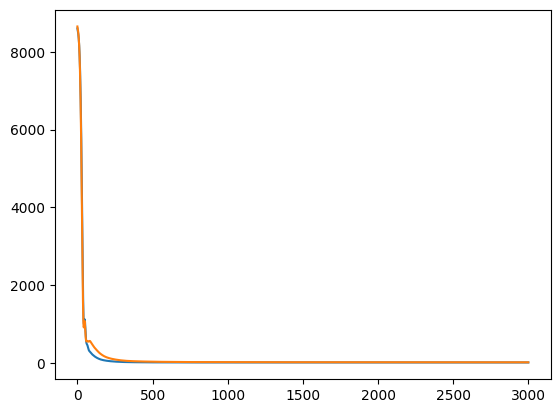

In [38]:
plt.plot(losses)
plt.plot(losses_val)

In [39]:
import random
j = random.randint(0, len(y_test))

print(f"\nReal age = {y_test[j].item()}")
print(f"Predicted age = {model_nn(x_test[j]).item()}")


Real age = 95.0999984741211
Predicted age = 92.34696197509766


In [40]:
results = model_nn(x_test).cpu().detach().numpy()
y_real = y_test.cpu().detach().numpy()
mse = mean_squared_error(y_real, results)
mae = mean_absolute_error(y_real, results)
r2 = r2_score(y_real, results)

print(f"mse =\t{mse}\nmae =\t{mae}\nr2 =\t{r2}")

mse =	20.452560424804688
mae =	3.09315824508667
r2 =	-0.47952639903127814
